**Промежуточная аттестация 3**

*Применение YOLO*

In [1]:
!pip install opencv-python-headless

!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names

     ---------------------------------------- 38.0/38.0 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [3]:
print(cv2.__version__)

4.8.1


Загрузка предобученной модели YOLO:

In [4]:
# Загружаем предварительно обученные веса и конфигурацию YOLO
yolo_net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Загружаем имена классов (объектов) из файла coco.names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Получаем имена всех слоев в сети YOLO    
layer_names = yolo_net.getLayerNames()

# Получаем индексы выходных слоев (т.е. слоев, на которых мы будем основываться для обнаружения)
output_layers_indices = yolo_net.getUnconnectedOutLayers().flatten()
output_layers = [layer_names[i - 1] for i in output_layers_indices]


Функция для обнаружения объектов на изображении:

In [15]:
def detect_objects(image_file):
    img = cv2.imread(image_file) # Загружаем изображение с помощью OpenCV
    img = cv2.resize(img, None, fx=0.8, fy=0.8) # Можно изменить размер для ускорения
    height, width, channels = img.shape

    # Преобразуем изображение в формат, который подходит для YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    yolo_net.setInput(blob)

    # Применяем прямой проход (forward pass) и получаем прогнозы
    outs = yolo_net.forward(output_layers)

    # Информация для показа на экране (название класса, вероятность, координаты ограничивающего прямоугольника)
    class_ids = []
    confidences = []
    boxes = []

    # Проходим по всем обнаруженным объектам
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2: # Устанавливаем порог уверенности
                # Координаты объекта
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Координаты верхнего левого угла прямоугольника
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Применяем подавление немаксимальных значений для устранения слабых перекрытий
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Показываем информацию на экране
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    for i in range(len(boxes)):
        if i in indexes:
            label = str(classes[class_ids[i]])
            color = colors[i]
            x, y, w, h = boxes[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label + " " + str(round(confidences[i], 2)), (x, y + 30), font, 1.5, color, 1)  # размер шрифта - 1.5 и и толщина линии - 1
    
    # Показываем изображение с обнаруженными объектами
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


Применяем функцию к изображениям:

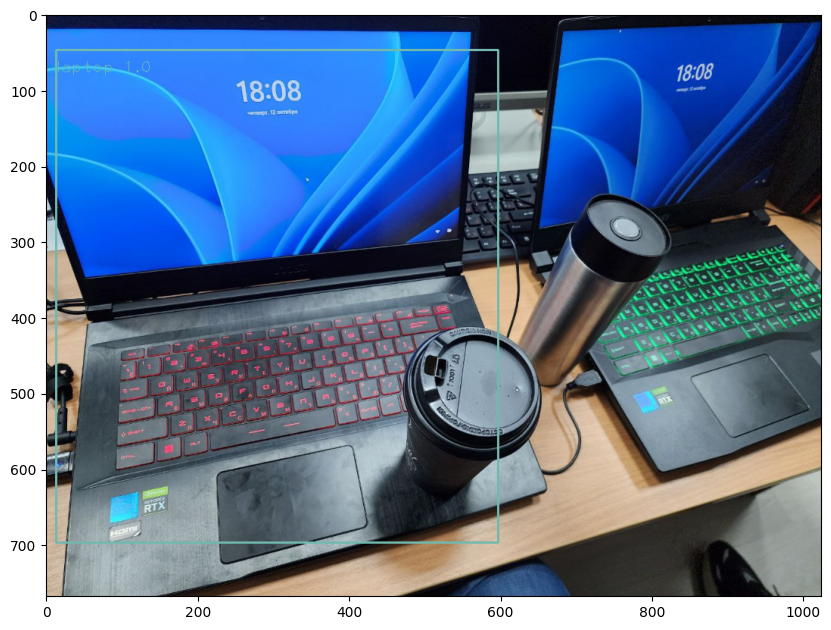

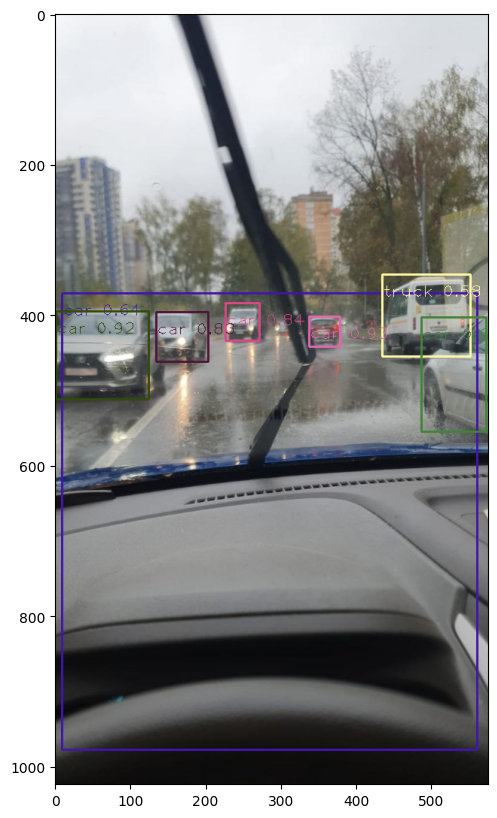

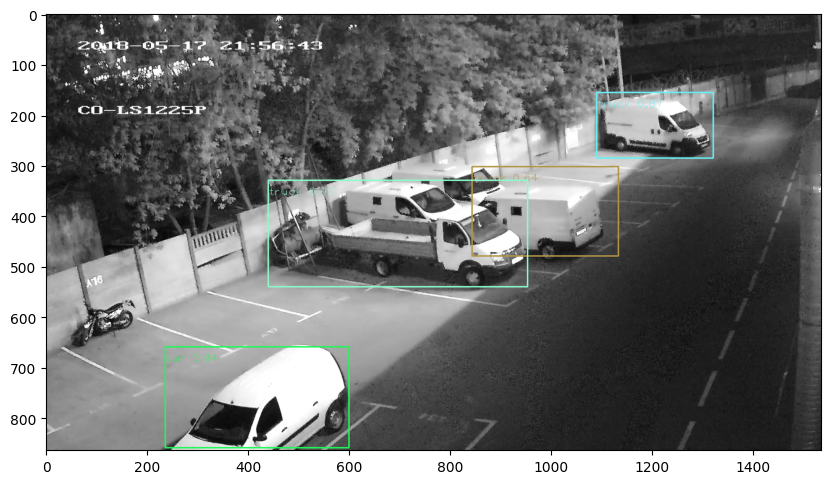

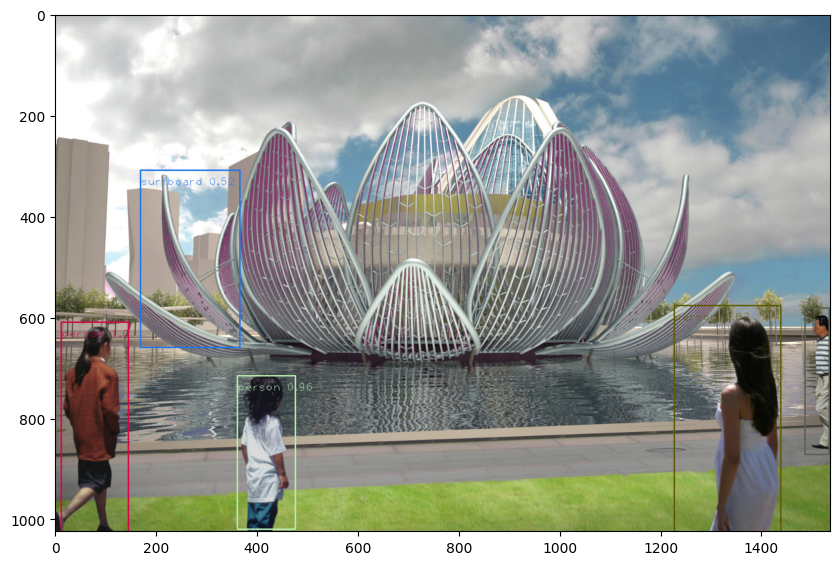

In [16]:
image_files = [
    "1.jpg",
    "2.jpg",
    "3.jpg",
    "4.jpg"
]

for image_file in image_files:
    detect_objects(image_file)

